In [1]:
import pandas as pd
import random as random
import numpy as np
import matplotlib.pyplot as plot

In [4]:
DATA_PATH = "./CSE575-HW03-Data.csv"

In [5]:
#pd.options.display.max_rows = 128
dataFrame = pd.read_csv(DATA_PATH, header=None)
data = dataFrame.to_numpy()

In [6]:
dataFrame

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,92.9894,-9.6430,-4.6412,-6.8569,-5.2263,-4.9604,2.3191,-0.4579,0.5685,1.8047,2.6274,5.2223,6.5404
1,73.4054,6.5269,-6.6736,0.5054,-4.4818,-5.1157,-6.3784,1.6296,-3.3999,0.0652,-2.5042,1.7626,-1.0612
2,94.6334,-4.5986,-12.4970,-6.3137,-6.7072,-7.4690,-6.7463,-3.6960,-3.4587,-1.4178,-1.3265,1.8756,0.6391
3,89.1135,-2.2287,0.2304,-2.7300,-0.9133,-1.9530,-1.0086,0.1486,2.0624,1.1938,-1.0113,0.1567,-1.2346
4,76.1929,2.5222,9.1796,4.3947,6.6885,4.0074,1.9488,2.2791,-0.2567,2.8208,-2.9867,-3.6861,-2.2471
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,86.5598,-4.0067,0.7036,1.3357,-6.9007,0.8063,-0.4726,-0.2890,-1.3798,3.1221,-2.5924,1.8249,-6.1399
124,83.8025,-3.4814,3.5016,-0.2959,-7.0385,2.3506,-3.7101,3.5613,-1.5063,3.9646,0.3750,0.8998,-1.9977
125,79.5542,-3.4625,-1.1868,2.6972,-6.5663,2.2622,-2.6907,3.2315,-3.5141,0.4649,-3.1912,0.9381,-3.8443
126,84.3496,-2.7338,-1.3004,2.2604,-6.9315,0.1138,-3.1434,1.6895,-3.1004,2.2891,0.2254,2.0268,-1.5204


In [7]:
data.shape

(128, 13)

In [8]:
# Check for null values in the dataset
dataFrame.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [9]:
def loss(data, clusters):
    total_loss = 0
    
    # Calculate distances and assign points to clusters
    for point in data:
        distances = [np.linalg.norm(cluster["center"] - point) for cluster in clusters.values()]
        cluster_index = np.argmin(distances)
        clusters[list(clusters.keys())[cluster_index]]["points"].append(point)
    
    # Calculate the total loss
    for index, cluster in clusters.items():
        distances_to_center = np.linalg.norm(np.array(cluster["points"]) - cluster["center"], axis=1)
        total_loss += np.sum(distances_to_center ** 2)
    
    return total_loss


In [10]:
K = [2, 3, 4, 5, 6, 7, 8, 9]
k_cluster = {}
k_loss = {}
for k in K:
    clusters = {}
    for i in range(k):
        center_index = random.randrange(int(i * 128 / k), int((i+1) * 128/ k))
        clusters[i] = {"center": data[center_index], "points": []}
    l = loss(data, clusters)
    k_loss[k] = [l]
    while True:
        prev_cluster = clusters
        for index in clusters:
            clusters[index]["center"] = np.mean(clusters[index]["points"], axis = 0)
            clusters[index]["points"] = []
        prev_loss = l
        l = loss(data, clusters)
        k_loss[k].append(l)
        if l >= prev_loss :
            k_cluster[k] = prev_cluster
            break

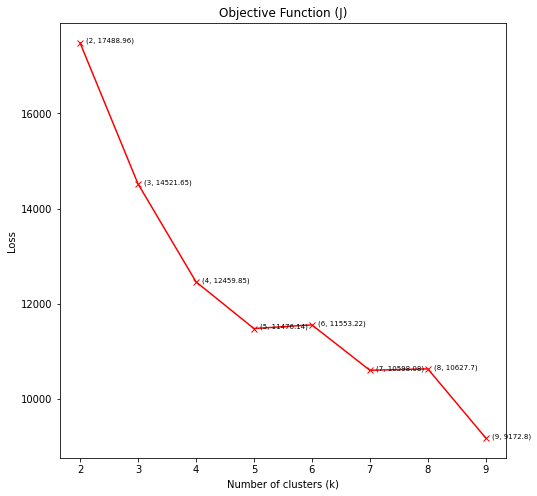

In [13]:
X = []
for i in k_loss.keys():
    X.append(i)
Y = []
for i in X:
    Y.append(k_loss[i][-2])  
plot.figure(num=None, figsize=(8, 8))
plot.plot(X, Y, color='red', marker='x')
for i in range(len(X)):
    s = "(" + str(X[i]) + ", " + str(round(Y[i],2)) + ")"
    plot.text(X[i] + 0.1, Y[i]-0.02, s, fontsize=7)
plot.title("Objective Function (J)")
plot.xlabel("Number of clusters (k)")
plot.ylabel("Loss")
plot.savefig("HW3_Q2(1).png")
plot.show()

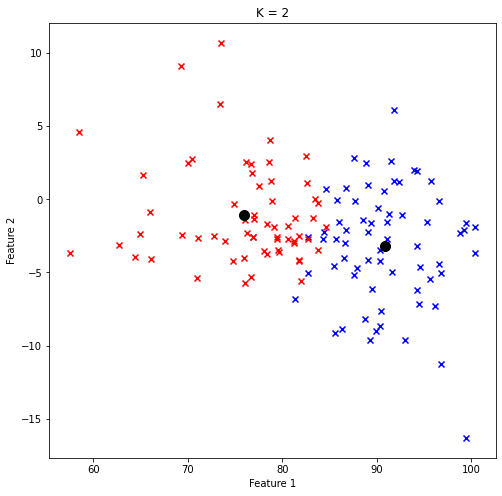

In [15]:
plot.figure(num=None, figsize=(8, 8))
plot.scatter(np.array(k_cluster[2][0]["points"])[:,:2][:,0], np.array(k_cluster[2][0]["points"])[:,:2][:,1], c="blue", marker='x')
plot.scatter(np.array(k_cluster[2][1]["points"])[:,:2][:,0], np.array(k_cluster[2][1]["points"])[:,:2][:,1], c="red", marker='x')
plot.scatter([k_cluster[2][0]["center"][:2][0]], [k_cluster[2][0]["center"][:2][1]], c="black", marker='.', s = 400, alpha=1)
plot.scatter([k_cluster[2][1]["center"][:2][0]], [k_cluster[2][1]["center"][:2][1]], c="black", marker='.', s = 400, alpha=1)
plot.title("K = 2")
plot.xlabel("Feature 1")
plot.ylabel("Feature 2")
# plot.savefig("HW3_Q2(2).png")
plot.show()

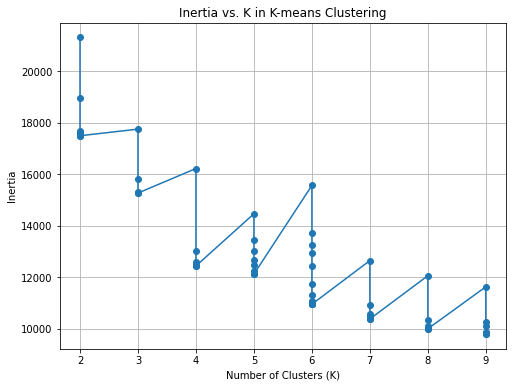

In [12]:
# # Plotting the graph of inertia vs. K
# plot.figure(figsize=(8, 6))
# plot.plot(k_values, inertia_values, marker='o')
# plot.title('Inertia vs. K in K-means Clustering')
# plot.xlabel('Number of Clusters (K)')
# plot.ylabel('Inertia')
# plot.xticks(np.arange(2, 10))
# plot.grid(True)
# plot.show()

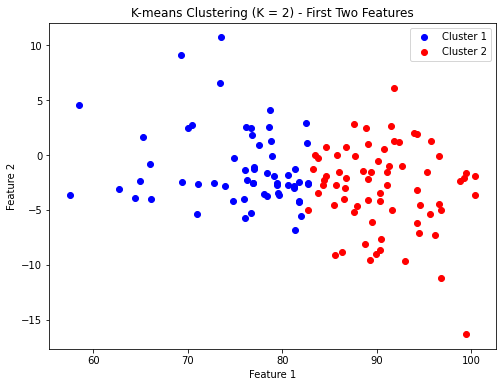

In [16]:
# plot.figure(figsize=(8, 6))
# plot.scatter(cluster_1[:, 0], cluster_1[:, 1], color='blue', label='Cluster 1')
# plot.scatter(cluster_2[:, 0], cluster_2[:, 1], color='red', label='Cluster 2')
# plot.title('K-means Clustering (K = 2) - First Two Features')
# plot.xlabel('Feature 1')
# plot.ylabel('Feature 2')
# plot.legend()
# plot.show()